<a href="https://colab.research.google.com/github/dscohen75/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [ ]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   created               48818 non-null  object 
 3   description           47393 non-null  object 
 4   display_address       48685 non-null  object 
 5   latitude              48818 non-null  float64
 6   longitude             48818 non-null  float64
 7   price                 48818 non-null  int64  
 8   street_address        48808 non-null  object 
 9   interest_level        48818 non-null  object 
 10  elevator              48818 non-null  int64  
 11  cats_allowed          48818 non-null  int64  
 12  hardwood_floors       48818 non-null  int64  
 13  dogs_allowed          48818 non-null  int64  
 14  doorman               48818 non-null  int64  
 15  dishwasher         

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


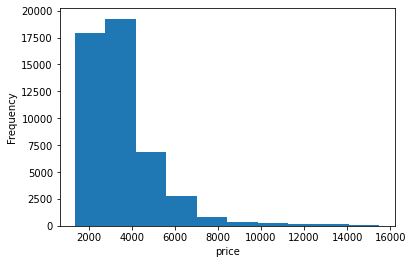

In [ ]:
df['price'].plot(kind='hist')
plt.xlabel('price');

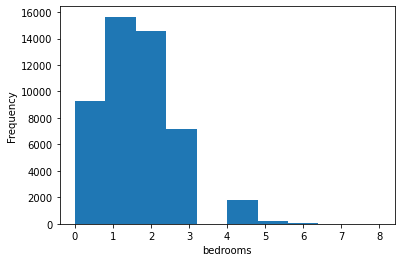

In [ ]:
df['bedrooms'].plot(kind='hist')
plt.xlabel('bedrooms');

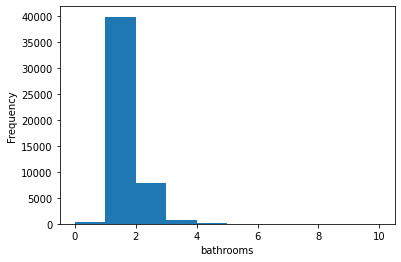

In [ ]:
df['bathrooms'].plot(kind='hist')
plt.xlabel('bathrooms');

In [ ]:
# I wanted boxplots of price by bedrooms
# This gave an error and I'm not sure why
plt.box(df['price'][df['bedrooms']==1])
plt.xlabel('bedrooms')
plt.ylabel('price');

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa8adc58950> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [ ]:
df['price'][df['bedrooms']==1]

2        2850
3        3275
7        5645
8        1725
11       1675
         ... 
49344    3645
49345    2179
49346    4500
49348    3950
49349    2595
Name: price, Length: 15651, dtype: int64

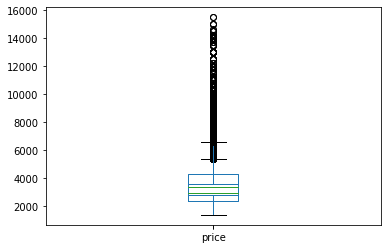

In [ ]:
# This only allows me to plot one boxplot at a time
# otherwise they stack on top of each other
df[df['bedrooms']==1]['price'].plot(kind='box')
df[df['bedrooms']==2]['price'].plot(kind='box');

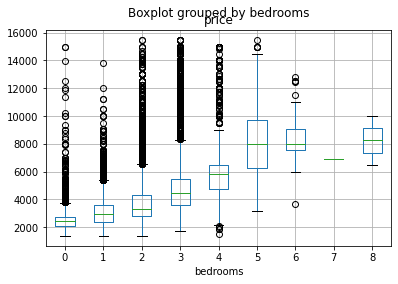

In [ ]:
# This is what I wanted!

df.boxplot('price', by='bedrooms');

Let's use bedrooms as our feature and price is the target.

In [ ]:
# y is our target and X is the feature matrix

target = 'price'
y = df[target]
X = df[['bedrooms']]

In [ ]:
y.shape

(48818,)

In [ ]:
y.head()

0    3000
1    5465
2    2850
3    3275
4    3350
Name: price, dtype: int64

In [ ]:
X.shape

(48818, 1)

In [ ]:
# Use the mean of all rents as the baseline.

from sklearn.metrics import mean_absolute_error

In [ ]:
y_baseline = [y.mean()] * len(y)
print('Baseline MAE = ', mean_absolute_error(y, y_baseline))

Baseline MAE =  1201.5251847945751


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X)

In [ ]:
y_pred

array([4827.73665176, 3974.48248423, 3121.22831671, ..., 3121.22831671,
       2267.97414918, 3974.48248423])

In [ ]:
print('Training MAE = ', mean_absolute_error(y, y_pred))

Training MAE =  975.6559731054491


Decent improvement in MAE from the naive baseline.

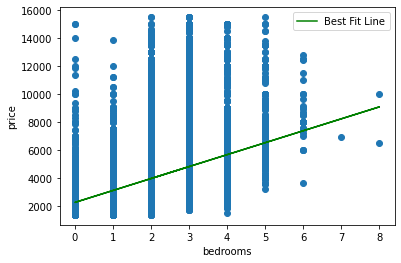

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='green', label='Best Fit Line')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.legend();

In [ ]:
model.intercept_

2267.9741491780505

In [ ]:
model.coef_[0]

853.2541675274308

In [ ]:
def rent_predict(X, y, br):
  # Takes training data X and Y,
  # a number of bedrooms br, and returns the predicted rent

  from sklearn.linear_model import LinearRegression
  import matplotlib.pyplot as plt

  model = LinearRegression()

  model.fit(X,y)

  y_pred = model.predict(X)

  plt.scatter(X,y)
  plt.plot(X, y_pred, color='green', label='Best Fit Line')
  plt.xlabel('bedrooms')
  plt.ylabel('price')
  plt.legend();

  predicted_rent = model.intercept_ + model.coef_[0] * br

  print(f'The predicted rent for {br} bedrooms is', round(predicted_rent, 2), '\n')
  
  #print(f'The predicted rent for {br} bedrooms is '  + "{:.2f}".format(predicted_rent))

The predicted rent for 4 bedrooms is 5680.99 



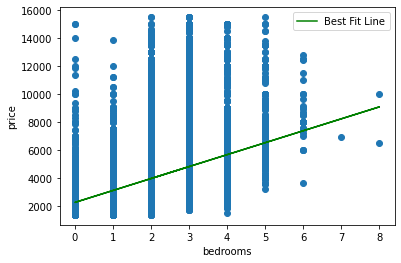

In [ ]:
rent_predict(df[['bedrooms']], df['price'], 4)